In [3]:
from gen_bits_with_probability import gen_bits_with_probability
import numpy as np
from numpy import random

length  = 128
probabilities = [0.5, .5] # probability of  0 and 1 respectively
np.random.seed(1527)
random.seed(1527)
bit_numpy = np.random.randint(0, 2, size=128)
bit_pyrandom = [random.randint(0, 1) for _ in range(128)]
bit_custm = gen_bits_with_probability(128, probabilities)
print(bit_pyrandom)
print(bit_numpy)
print(bit_custm)
print(np.array_equal(bit_numpy, bit_pyrandom))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1]
01001001100001101001101100100000100110110111110110010010111000110011011110111111010001001010101100010001011111001100010010111111
False


# **Test with *n* item's prob**

In [4]:
# %%time
from scipy import stats
import numpy as np
import random
import math
from math import log2
from numpy import zeros

''' set number of bits so that it we can have 2^b items, here items represents each bit sequence.
For example 4 bits would have 2^4 = 16 bit sequences'''

number_bits = 4

'''different ways to generate the items'''

# items = zeros(2 ** number_bits, dtype=np.int8) # 2 represents 0 and 1 of a bit string. initialize the array with smallest possible data type to save RAM!


items = []
for i in range(2 ** number_bits):
    items.append(i)

# items = np.linspace(start=0.0, stop=2 ** number_bits, num=2 ** number_bits, endpoint=True)
# items =  np.arange(0,(2**number_bits), step=1)

num_items = len(items) # values of the random variable X
probs = []


'''choose one of the following distribution names'''
    ## dist_name: custom, zipf, zipfian, logser, boltzmann, dlaplace, geom, betabinom,uniform, yulesimon, skellam
    ## poisson, planck, nchypergeom_fisher, nchypergeom_wallenius, uniform

dist_name = 'zipf' #  insert as string


match dist_name:
    case 'custom':
        '''chosse one of the following probability distributions'''
        probs = [.4, .4, .1, .1]
        # probs = [1/4, 3/4]
        # probs = [7/8, 1/16, 1/16]  # probabilities of the values manually defined, 3 items
        # probs = [1/2, 1/4, 1/8, 1/8]  # probabilities of the values manually defined, 4 items
        # probs = [3/4, 1/8, 1/16, 1/16]  # probabilities of the values manually defined, 4 items
        # probs = [1/2, 1/4, 1/8, 1/16, 1/16]  # probabilities of the values manually defined, 5 items
        # probs = [1/4, 1/8, 1/8, 1/8, 1/8, 1/8, 1/16, 1/16]  # probabilities of the values manually defined, 8 items

        ##  paper and book example probabilities:
        # probs = [2 ** (-3/4), (1 - 2 ** (-3/4))/7,(1 - 2 ** (-3/4))/7, (1 - 2 ** (-3/4))/7, (1 - 2 ** (-3/4))/7, (1 - 2 ** (-3/4))/7, (1 - 2 ** (-3/4))/7, (1 - 2 ** (-3/4))/7 ]

        probs = np.array(probs) # convert manually set probs to numpy array
        print('Nr. Items:', len(probs))
    case 'zipf':
        from scipy.stats import zipf # Generate the probabilities using the Zipf distribution
        
        _param = 1.2 # _param > 1.0
        probs = zipf.pmf(np.arange(1, (num_items+1)), _param)
        probs /= probs.sum() # Normalize the probabilities so their sum is 1.0
    case 'zipfian':
        from scipy.stats import zipfian
        a, n = 1.25, 10
        probs = zipfian.pmf(np.arange(1, (num_items+1)), a,n)
        probs /= probs.sum()
    case 'logser':
        from scipy.stats import logser
        p = 0.99 #for smaller p values the first item has a higher probability, 0<p<1
        probs = logser.pmf(np.arange(1, (num_items+1)), p)
        probs /= probs.sum()
    case 'boltzmann':
        from scipy.stats import boltzmann
        lambda_, N = 1.4, 19
        probs = boltzmann.pmf(np.arange(1, (num_items+1)),  lambda_, N)
        probs /= probs.sum()
    case 'dlaplace':
        from scipy.stats import dlaplace
        a = 0.1
        probs = dlaplace.pmf(np.arange(1, (num_items+1)),  a)
        probs /= probs.sum()
    case 'geom':
        from scipy.stats import geom
        p = .2
        probs = geom.pmf(np.arange(1, (num_items+1)),  p)
        probs /= probs.sum()
    case 'betabinom':
        from scipy.stats import betabinom
        n, a, b = 5, 2.3, 0.63
        probs = betabinom.pmf(np.arange(1, (num_items+1)),  n,a,b)
        probs /= probs.sum()
    case 'uniform':
        from numpy import random
        probs = np.random.random(size=num_items)
        probs /= probs.sum()
    case 'yulesimon':
        from scipy.stats import yulesimon
        a = .01 # 11 gives first item 0.9 probability and 0.01 gives 0.299 for the first item
        probs = yulesimon.pmf(np.arange(1, (num_items+1)),  a)
        probs /= probs.sum()
    case 'skellam':
        from scipy.stats import skellam
        mu1, mu2 = 15, 8
        probs = skellam.pmf(np.arange(1, (num_items+1)),  mu1, mu2)
        probs /= probs.sum()
    case 'poisson':
        from scipy.stats import poisson
        mu = 0.6
        probs = poisson.pmf(np.arange(1, (num_items+1)),  mu)
        probs /= probs.sum()
    case 'planck':
        from scipy.stats import planck
        alpha = 0.5
        probs = planck.pmf(np.arange(1, (num_items+1)),  alpha)
        probs /= probs.sum()
    case 'nchypergeom_wallenius':
        from scipy.stats import nchypergeom_wallenius
        M, n, N, odds = 140, 80, 60, 0.5
        probs = nchypergeom_wallenius.pmf(np.arange(1, (num_items+1)),  M, n, N, odds)
        probs /= probs.sum()
    case 'nchypergeom_fisher':
        from scipy.stats import nchypergeom_fisher
        M, n, N, odds = 140, 80, 60, 0.5
        probs = nchypergeom_fisher.pmf(np.arange(1, (num_items+1)),  M, n, N, odds)
        probs /= probs.sum()
    case _:
        print('No distribution name given or wrong distribution name.')


'''Calculate the minimum entropy'''
min_entropy = - math.log2(max(probs))

''' Calculate the Shannon entropy '''
entropy_shannon = stats.entropy(probs, base=2) # by python stats module


print('Distribution name:', str(dist_name))
print('Probabilities: ', np.round(probs, decimals=3))
print('Sum of probabilities: ', np.round(sum(probs), decimals=3))
print('Max probability: ', np.round(max(probs), decimals=3))
print('Shannon entropy : ', np.round(entropy_shannon, decimals=3))
# print('Calculated Shannon entropy: ', np.round(entropy_formula(probs), decimals=3)
print('Min entropy: ', np.round(min_entropy, decimals=3))

'''
Problem : what would be the entropy of the remaining items if we take out THAT one item with max probability,
given that the rest items DOES NOT have UNIFORM prob distribution ?'''
item_remove = 'one_max' # choose one of the following: 'all_max', 'one_max'
# item_remove = 'all_max' # choose one of the following: 'all_max', 'one_max'
match item_remove:
    case 'all_max':
        '''remove ALL the item with max probability and renormalize probability for the rest of the items'''
        prob_max = probs.max()
        new_probs = probs[probs != prob_max]
        prob_adjust = 1 - prob_max* (len(probs)- len(new_probs))
        # print(prob_adjust)
        # new_probs = [item / prob_adjust for item in new_probs]
        # print(new_probs)
    case 'one_max':
        '''remove only ONE item with max probability'''''
        prob_max_val = probs.max()
        prob_max = np.argmax(probs)
        probs =list(probs)
        del probs[prob_max]
        new_probs = np.array(probs)
        prob_max = prob_max_val
        prob_adjust = 1 - prob_max
        # new_probs = [item / prob_adjust for item in new_probs]
        # print(new_probs)

new_probs = [item / prob_adjust for item in new_probs]

'''# Calculate the new minimum entropy'''
min_entropy_new = - log2(max(new_probs))

''' Calculate the new Shannon entropy using the stats module'''
entropy_shannon_new = stats.entropy(new_probs, base=2)
entropy_shannon_new = np.round(entropy_shannon_new, decimals=3)

'''with shannon entropy from original probs distribution, calculate the remaining entropy'''
bin_entropy_h = - (prob_max * log2(prob_max) + (1-prob_max) * log2(1-prob_max))# binary entropy of the prob max

'''remaining entropy calculation'''
entropy_remaining = (entropy_shannon - bin_entropy_h)/ (1 - prob_max)
entropy_remaining = np.round(entropy_remaining, decimals=3)

entropy_remaining_test = entropy_shannon + (prob_max * log2(len(new_probs))) - bin_entropy_h

# print('New Probabilities: ', np.round(new_probs), decimals=3)
print('Remaining items:', len(new_probs))
print('Ousted prob:' , np.round(prob_max, decimals=3))
print('New Probabilities: ', np.round(new_probs, decimals=3))
print('Sum of new probabilities: ',np.round(sum(new_probs), decimals=3))
print('New Max probability: ', np.round(max(new_probs), decimals=3))
print('New Shannon entropy: ', entropy_shannon_new)
# print('Updated Calculated Shannon entropy: ', entropy_formula(new_probs))
print('New Min entropy: ', np.round(min_entropy_new, decimals=3))
print('Calculated remaining entropy:', np.round(entropy_remaining, decimals=3))
print(np.array_equal(entropy_shannon_new, entropy_remaining))
print('Remaining entropy estimate:', np.round(entropy_remaining_test, decimals=3))


Distribution name: zipf
Probabilities:  [0.365 0.159 0.098 0.069 0.053 0.043 0.035 0.03  0.026 0.023 0.021 0.019
 0.017 0.015 0.014 0.013]
Sum of probabilities:  1.0
Max probability:  0.365
Shannon entropy :  3.134
Min entropy:  1.453
Remaining items: 15
Ousted prob: 0.365
New Probabilities:  [0.251 0.154 0.109 0.083 0.067 0.056 0.047 0.041 0.036 0.032 0.029 0.027
 0.024 0.022 0.021]
Sum of new probabilities:  1.0
New Max probability:  0.251
New Shannon entropy:  3.445
New Min entropy:  1.997
Calculated remaining entropy: 3.445
True
Remaining entropy estimate: 3.614


## Results

In [ ]:

#Distribution name: logser
Probabilities:  [0.215 0.106 0.07  ... 0.    0.    0.   ]
Sum of probabilities:  1.0
Max probability:  0.215
Shannon entropy :  5.282
Min entropy:  2.218
Remaining items: 1048575
Ousted prob: 0.215
New Probabilities:  [0.136 0.089 0.066 ... 0.    0.    0.   ]
Sum of new probabilities:  1.0
New Max probability:  0.136
New Shannon entropy:  5.772
New Min entropy:  2.883
Calculated remaining entropy: 5.772
True
Remaining entropy estimate: 8.831

# zipf
Nr. Items: 16
Probabilities:  [0.365 0.159 0.098 0.069 0.053 0.043 0.035 0.03  0.026 0.023 0.021 0.019
 0.017 0.015 0.014 0.013]
Sum of probabilities:  1.0
Max probability:  0.365
Shannon entropy :  3.134
Min entropy:  1.453
Remaining items: 15
Ousted prob: 0.365
New Probabilities:  [0.251 0.154 0.109 0.083 0.067 0.056 0.047 0.041 0.036 0.032 0.029 0.027
 0.024 0.022 0.021]
Sum of new probabilities:  1.0
New Max probability:  0.251
New Shannon entropy:  3.445
New Min entropy:  1.997
Calculated remaining entropy: 3.445
True

#Book example
Nr. Items: 8
Probabilities:  [0.595 0.058 0.058 0.058 0.058 0.058 0.058 0.058]
Sum of probabilities:  1.0
Max probability:  0.595
Shannon entropy :  2.112
Min entropy:  0.75
Remaining items: 7
Ousted prob: 0.595
New Probabilities:  [0.143 0.143 0.143 0.143 0.143 0.143 0.143]
Sum of new probabilities:  1.0
New Max probability:  0.143
New Shannon entropy:  2.807
New Min entropy:  2.807
Calculated remaining entropy: 2.807
True

# Nr. Items: 5
Probabilities:  [0.5   0.25  0.125 0.062 0.062]
Sum of probabilities:  1.0
Max probability:  0.5
Shannon entropy :  1.875
Min entropy:  1.0
Remaining items: 4
Ousted prob: 0.5
New Probabilities:  [0.5   0.25  0.125 0.125]
Sum of new probabilities:  1.0
New Max probability:  0.5
New Shannon entropy:  1.75
New Min entropy:  1.0
Calculated remaining entropy: 1.75
True

#Nr. Items: 4, probs = [3/4, 1/8, 1/16, 1/16]
Probabilities:  [0.75  0.125 0.062 0.062]
Sum of probabilities:  1.0
Max probability:  0.75
Shannon entropy :  1.186
Min entropy:  0.415
Remaining items: 3
Ousted prob: 0.75
New Probabilities:  [0.5  0.25 0.25]
Sum of new probabilities:  1.0
New Max probability:  0.5
New Shannon entropy:  1.5
New Min entropy:  1.0
Calculated remaining entropy: 1.5

#Nr. Items: 4, probs = [1/2, 1/4, 1/8, 1/8]
Probabilities:  [0.5   0.25  0.125 0.125]
Sum of probabilities:  1.0
Max probability:  0.5
Shannon entropy :  1.75
Min entropy:  1.0
Remaining items: 3
Ousted prob: 0.5
New Probabilities:  [0.5  0.25 0.25]
Sum of new probabilities:  1.0
New Max probability:  0.5
New Shannon entropy:  1.5
New Min entropy:  1.0
Calculated remaining entropy: 1.5
True

#Nr. Items: 3 , probs = [7/8, 1/16, 1/16]
Probabilities:  [0.875 0.062 0.062]
Sum of probabilities:  1.0
Max probability:  0.875
Shannon entropy :  0.669
Min entropy:  0.193
Remaining items: 2
Ousted prob: 0.875
New Probabilities:  [0.5 0.5]
Sum of new probabilities:  1.0
New Max probability:  0.5
New Shannon entropy:  1.0
New Min entropy:  1.0
Calculated remaining entropy: 1.0
True

#Nr. Items: 2
Distribution name: custom
Probabilities:  [0.25 0.75]
Sum of probabilities:  1.0
Max probability:  0.75
Shannon entropy :  0.811
Min entropy:  0.415
Remaining items: 1
Ousted prob: 0.75
New Probabilities:  [1.]
Sum of new probabilities:  1.0
New Max probability:  1.0
New Shannon entropy:  0.0
New Min entropy:  -0.0
Calculated remaining entropy: 0.0
True


## Observations

OK= zipf, logser, poisson, zipfian, yulesimon, geom
NOT OK = planck, , betabinom,[hypergeom, ficher noncentralhyper, Wallenius (new sum is >1)]

for boltzman, the new distribution keeps the values of the original distribution

>> Min entropy does not capture the  guessing complexity which is needed for the brute force attack
 to break a key. For example, if we have a very high random bit sequence then we should have  Min-entropy ~1.0 
 but that does not change with the bit string's length. That is uniformly generated 2^16 bit sequence and 2^128 bit
 sequence have Min-entropy ~ 1.0.  This does not give us the full picture of the key's strength.
 Min-entropy can only hints about the underlying distribution. SO it tells about the goodness of the key's 
 randomness but not the hardness of the key.

>> Duality of the distribution.
Random number generator produces bitstrings from some entropy source. Which gurantees that the distribution of the bitstring is near to uniform. But then those raw bitstring is to clip of to a certain (desired length) that can be used a key for cryptopgraphic application. What if one of this bit sequences is having non-uniform probability?
If we can pop it out and ommit ths from the avaiable pool of keys, can we asses the remaining probability of the key pool, without reassesing all the possible keys?


In [6]:
## Proof of Lemma 5 when |X|= 2 and 0 < p < .5


x1 = 1/4 # <0.5
x2 = 1 - 1/4
X = [x1, x2]

leamma_5 = - 2 * x1 * log2(x1) # -2plog(p) when 0<p<0.5

H_X = stats.entropy(X, base=2)
H_min = - log2(max(X))

print(H_X, leamma_5)
print(H_min)

0.8112781244591328 1.0
0.4150374992788438


### Plot the  original and new distributions after ousting the item that has the highest probability

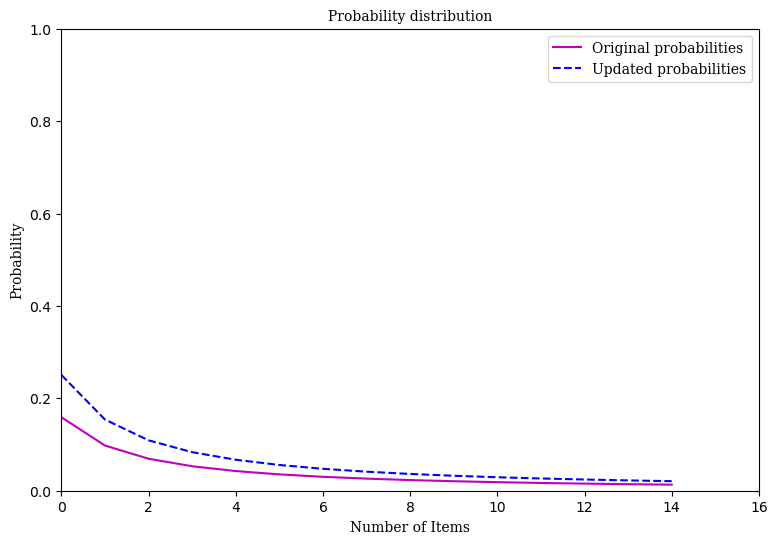

In [12]:

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# from math import log2

font = FontProperties()
font.set_family('serif')
# font.set_name('Times')
font.set_size(10)

# plt.rcParams.update({
#     # 'font.size': 12,
#     'text.usetex': True,
#     'font.serif': 'Times New Roman',
#     })


fig = plt.figure(figsize=(9,6 ))
ax = fig.add_subplot(111)
ax.plot(probs, 'm', label='Original probabilities')
ax.plot(new_probs, 'b--', label='Updated probabilities')
ax.set_ylim([0, 1])
ax.set_xlim([0, num_items])
# ax.set_xscale('log', base=2)
# ax.set_xticks([0, 2, 4, 8, 16])
# ax.set_xticks([0, 2, 4, 8, 16, 32, 64, 128, 256])


ax.legend(loc='upper right')
ax.set_xlabel('Number of Items', fontproperties=font)
ax.set_ylabel('Probability', fontproperties=font)
# ax.set_ylabel(r'$\int\ Y^2\ dt\ \ [V^2 s]$')
ax.set_title('Probability distribution', fontproperties=font)
plt.legend(prop=font, loc='upper right')

plt.show()

# fig.savefig('plot.pdf', dpi=300)




In [13]:
'''### Example 2.1.2[Cover, Thomas, p:14]'''

from entropy_formula import entropy_formula
num_items = [0, 1, 2, 3] # values of the random variable X
probs = [1/2, 1/4, 1/8, 1/8]  # probabilities of the values

entropy_shannon = stats.entropy(probs, base=2) # by python stats module
entropy_shannon, entropy_formula(probs)

## this means that to encode the information of the random variable X = number of items in (xk), we need at least 2 bits

(1.75, 1.75)

In [14]:
class RenormalizeDistribution:
    def __init__(self, probabilities):
        self.probabilities = probabilities

    def remove_and_renormalize(self, index_to_remove):
        # Check if the index is valid
        if index_to_remove < 0 or index_to_remove >= len(self.probabilities):
            print("Invalid index to remove.")
            return

        # Remove the probability at the specified index
        removed_probability = self.probabilities.pop(index_to_remove)

        # Calculate the normalization factor
        normalization_factor = sum(self.probabilities)

        # Renormalize the probabilities
        if normalization_factor > 0:
            self.probabilities = [p / normalization_factor for p in self.probabilities]

        # Print the updated probabilities
        print("Updated probabilities after removing index", index_to_remove, ":", self.probabilities)

# Example usage:
initial_probabilities = [1/2, 1/4, 1/8, 1/8]
distribution = RenormalizeDistribution(initial_probabilities)

# Remove the first probability (index 0) and renormalize
distribution.remove_and_renormalize(1)


Updated probabilities after removing index 1 : [0.6666666666666666, 0.16666666666666666, 0.16666666666666666]


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


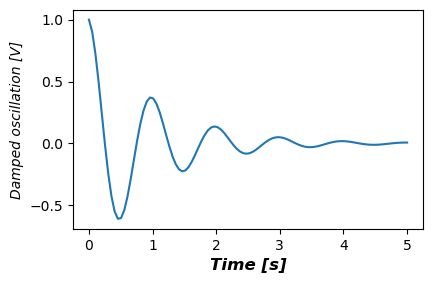

In [15]:
from matplotlib.font_manager import FontProperties

x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.set_xlabel('Time [s]', fontsize='large', fontweight='bold', fontproperties=font)
ax.set_ylabel('Damped oscillation [V]', fontproperties=font)

plt.show()

In [ ]:
import numpy as np
from scipy.stats import ga

'''Set number of items that needs to be generated'''
num_items = 27
num_seq = 2 ** num_items # values of the random variable X
probs = np.random.random(size=num_seq)
probs /= probs.sum()


print(probs)
print(sum(probs))
print(max(probs))

# Construct probabilities from a chosen distribution

In [ ]:
import numpy as np
from entropy_formula import entropy_formula
from scipy import stats

'''Set number of items that needs to be generated'''
num_items = 8
num_seq = 2 ** num_items # values of the random variable X



# '''Generate the probabilities using the Normal/Gaussian distribution (randint func)'''

probs = np.random.random(size=num_seq)

'''Generate the probabilities using the discreet Laplace distribution'''

# from scipy.stats import dlaplace # Discrete Laplace distribution
# '''Define  the scale parameter for the Laplace distribution'''
# scale_param = 1.0
# probs = dlaplace.pmf(np.arange(1, num_seq+1), scale_param)
# probs /= probs.sum()

'''Print some metrics'''
prob_max= sorted(probs, reverse=True)
entropy_min = - (np.log2(prob_max[0]))
entropy_shannon = stats.entropy(probs, base=2) # by python stats module


from typing import Counter

print(probs)
# print(Counter(probs))
print('Sum of probabilities: ',sum(probs))
print('Shannon entropy: ', entropy_shannon)
print('Min entropy: ', entropy_min)

# Bitstring generator Class

In [ ]:
import numpy as np
from scipy.stats import zipf, planck

class BitStringGenerator:
    def __init__(self):
        pass

    def generate_uniform(self, size):
        bit_string = np.random.randint(0, 2, size)
        return ''.join(map(str, bit_string))

    def generate_normal(self, size, mean=0, std_dev=1):
        random_values = np.random.normal(mean, std_dev, size)
        bit_string = (random_values >= 0.5).astype(int)
        return ''.join(map(str, bit_string))

    def generate_gamma(self, size, shape=2, scale=1):
        random_values = np.random.gamma(shape, scale, size)
        bit_string = (random_values >= 0.5).astype(int)
        return ''.join(map(str, bit_string))


    def generate_laplace(self, size, loc=0.5, scale=0.1):
        random_values = np.random.laplace(loc, scale, size)
        bit_string = (random_values >= 0.5).astype(int)
        return ''.join(map(str, bit_string))

    def generate_zipf(self, size, a=2):
        zipfian_values = zipf.rvs(a, size=size)
        max_value = max(zipfian_values)
        bit_string = (zipfian_values == max_value).astype(int)
        return ''.join(map(str, bit_string))

    def generate_planck(self, size, lam=1.0):
        planck_values = planck.rvs(lam, size=size)
        bit_string = (planck_values >= max(planck_values) / 2).astype(int)
        return ''.join(map(str, bit_string))

# Example usage:
size = 16

bit_string_generator = BitStringGenerator()

# Generate bit strings with different distributions
uniform_bit_string = bit_string_generator.generate_uniform(size)
normal_bit_string = bit_string_generator.generate_normal(size)
gamma_bit_string = bit_string_generator.generate_gamma(size)
laplace_bit_string = bit_string_generator.generate_laplace(size)
zipf_bit_string = bit_string_generator.generate_zipf(size)
planck_bit_string = bit_string_generator.generate_planck(size)

print("Uniform Bit String:", uniform_bit_string)
print("Normal Bit String:", normal_bit_string)
print("Gamma Bit String:", gamma_bit_string)
print("Laplace Bit String:", laplace_bit_string)
print("Zipfian Bit String:", zipf_bit_string)
print("Planck Bit String:", planck_bit_string)


# Example plot distribiution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, laplace, zipf, planck

# Generate random values for different distributions
size = 1000  # Sample size
uniform_values = np.random.rand(size)
normal_values = np.random.normal(0.5, 0.1, size)
gamma_values = np.random.gamma(2, 1, size)
laplace_values = np.random.laplace(0.5, 0.1, size)
zipf_values = zipf.rvs(2, size=size)
planck_values = planck.rvs(1, size=size)

# Create subplots for each distribution
distributions = {
    'Uniform': uniform_values,
    'Normal': normal_values,
    'Gamma': gamma_values,
    'Laplace': laplace_values,
    'Zipf': zipf_values,
    'Planck': planck_values
}

plt.figure(figsize=(14, 10))

for i, (name, values) in enumerate(distributions.items(), start=1):
    plt.subplot(2, 3, i)
    plt.hist(values, bins=30, density=True, alpha=0.6)
    plt.title(name + ' Distribution')
    x = np.linspace(min(values), max(values), 100)
    
    if name == 'Normal':
        # Plot the probability density function for the normal distribution
        mean, std_dev = np.mean(values), np.std(values)
        pdf = norm.pdf(x, mean, std_dev)
        plt.plot(x, pdf, 'r-', lw=2)
    elif name == 'Gamma':
        # Plot the probability density function for the gamma distribution
        shape, scale = 2, 1
        pdf = gamma.pdf(x, shape, scale)
        plt.plot(x, pdf, 'r-', lw=2)
    elif name == 'Laplace':
        # Plot the probability density function for the Laplace distribution
        loc, scale = 0.5, 0.1
        pdf = laplace.pdf(x, loc, scale)
        plt.plot(x, pdf, 'r-', lw=2)
    elif name == 'Zipf':
        # Plot the probability density function for the Zipf distribution
        a = 2
        pdf = zipf.pmf(x, a)
        plt.plot(x, pdf, 'r-', lw=2)
    elif name == 'Planck':
        # Plot the probability density function for the Planck distribution
        lam = 1
        pdf = planck.pmf(x, lam)
        plt.plot(x, pdf, 'r-', lw=2)

plt.tight_layout()
plt.show()
